In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')
path = "/content/gdrive/MyDrive/Praktikum_ML/Praktikum12"

Mounted at /content/gdrive


##Import Library Dasar

In [ ]:
#Import library dasar
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # untuk 3D plot
#Agar plot tampil rapi
plt.rcParams['figure.figsize'] = (8, 6)

##Load Dataset Sirup

In [ ]:
# Load dataset Wine
wine = load_wine()
df = pd.DataFrame (wine.data, columns=wine.feature_names)
df['target'] = wine.target
# Tampilkan 5 baris pertama
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


##Eksplorasi Awal Dataset Sirup

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
# Cek missing value
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Distribusi kelas target
print("Nama kelas:", wine.target_names)
df['target'].value_counts()

Nama kelas: ['class_0' 'class_1' 'class_2']


,count
target,
1,71
0,59
2,48


##Pemisahan Fitur dan Label

In [ ]:
# Fitur dan label
X = wine.data
#bisa juga: df[wine.feature_names].values
y = wine.target
#df['target'].values
print("Shape X:", X. shape) # (178, 13)
print("Shape y:", y.shape) # (178,)

Shape X: (178, 13)
Shape y: (178,)


##Pembagian Data Latih dan Data Uji (Train-Test Split)

In [ ]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)
print("Shape X_train:", X_train.shape)
print("Shape X_test", X_test.shape)

Shape X_train: (142, 13)
Shape X_test (36, 13)


##Standardisasi Data (Mean = 0, Std = 1)

In [ ]:
# Standardisasi (mean=0, std=1)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 0.38580089, -0.63787118,  1.77666817, -1.22453161,  0.69643032,
         0.52686525,  0.73229212, -0.1695489 , -0.41578344, -0.16746725,
         0.62437819,  0.2529082 ,  0.46772474],
       [ 0.94851892, -0.76544542,  1.25317383,  0.85328406,  0.09178497,
         1.17279546,  1.33318146, -0.59045701,  1.34974202,  0.30530313,
         1.06715537,  0.15104809,  1.81576773],
       [ 0.52335419, -0.51940939,  0.9540342 , -1.04643312, -0.44567755,
         0.93057163,  1.006382  , -0.1695489 , -0.26000178, -0.081509  ,
        -0.12834302,  0.89317174,  1.51620262],
       [ 0.97352861, -0.55585917,  0.16879269, -1.0761162 , -0.71440882,
         0.52686525,  0.81662747, -0.59045701,  0.36312485,  0.262324  ,
         0.8900445 ,  0.42752553,  1.93226527],
       [ 0.43582027,  0.82012009,  0.05661533,  0.55645325, -0.51286037,
        -0.55506784, -1.29175618,  0.75644894, -0.60618325,  1.47433535,
        -1.76661859, -1.43505932, -0.29783054]])

##Penerapan Model SVM tanpa PCA (Baseline Model).

In [ ]:
#Model SVM tanpa PCA
svm_no_pca = SVC (kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)

#Prediksi dan evaluasi
y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("Akurasi SVM tanpa PCA:", acc_no_pca)

print("\nClassification Report (tanpa PCA):")
print(classification_report(y_test, y_pred_no_pca, target_names=wine.target_names))

Akurasi SVM tanpa PCA: 0.9722222222222222

Classification Report (tanpa PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



##Penerapan PCA (Principal Component Analysis)

In [ ]:
# PCA dengan 3 komponen utama
pca = PCA(n_components= 3)

X_train_pca = pca.fit_transform (X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("Shape X_train_pca:", X_train_pca.shape) # (n_train, 3)
print("Shape X_test_pca:", X_test_pca.shape) # (n_test, 3)

Shape X_train_pca: (142, 3)
Shape X_test_pca: (36, 3)


##Menampilkan Variansi yang Dijelaskan oleh Setiap Komponen PCA.

In [ ]:
# Variansi yang dijelaskan oleh tiap komponen
explained_var =  pca.explained_variance_ratio_
print("Explained Variance Ratio tiap komponen:", explained_var)
print("Total variansi yang dijelaskan 3 komponen pertama:", explained_var.sum())

Explained Variance Ratio tiap komponen: [0.35792104 0.19270671 0.11019835]
Total variansi yang dijelaskan 3 komponen pertama: 0.6608261082211259


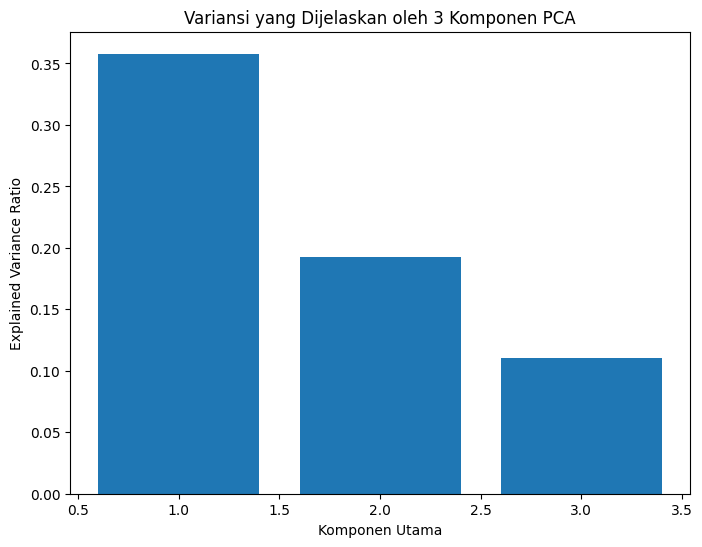

In [ ]:
plt.bar ([1, 2, 3], explained_var)
plt.xlabel('Komponen Utama')
plt.ylabel('Explained Variance Ratio')
plt.title('Variansi yang Dijelaskan oleh 3 Komponen PCA')
plt.show()

##Membangun Model SVM dengan PCA

In [ ]:
# Model SVM dengan PCA
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)
# Prediksi dan evaluasi
y_pred_pca = svm_pca.predict(X_test_pca)
acc_pca = accuracy_score (y_test, y_pred_pca)
print("Akurasi SVM dengan PCA (3 komponen): ", acc_pca)
print("\nClassification Report (dengan PCA):")
print(classification_report(y_test, y_pred_pca, target_names=wine.target_names))

Akurasi SVM dengan PCA (3 komponen):  0.9722222222222222

Classification Report (dengan PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



##Visualisasi PCA dalam Ruang 3 Dimensi

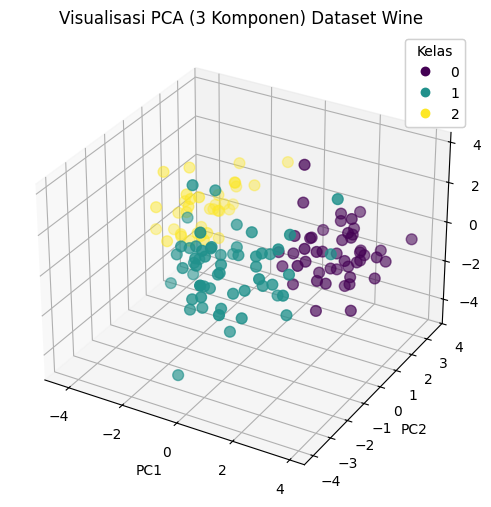

In [ ]:
# Visualisasi 3D PCA (menggunakan data train)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
  X_train_pca[:, 0],
  X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, s = 60
)

ax.set_title('Visualisasi PCA (3 Komponen) Dataset Wine')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Tambahkan legend berdasarkan kelas
legend1 = ax.legend(
*scatter.legend_elements(), title="Kelas"
)
ax.add_artist(legend1)
plt.show()

##Perbandingan Model SVM Tanpa PCA dan Dengan PCA

In [ ]:
# Membandingkan hasil model tanpa dan dengan PCA
comparison = pd.DataFrame({
  'Model': ['SVM Tanpa PCA', 'SVM Dengan PCA (3 Komponen)'],
  'Jumlah Fitur': [X_train_scaled.shape[1], X_train_pca.shape[1]],
  'Akurasi': [acc_no_pca, acc_pca],
  'Variansi Total PCA': [None, explained_var.sum()]
})
comparison

,Model,Jumlah Fitur,Akurasi,Variansi Total PCA
0,SVM Tanpa PCA,13,0.972222,NaN
1,SVM Dengan PCA (3 Komponen),3,0.972222,0.660826


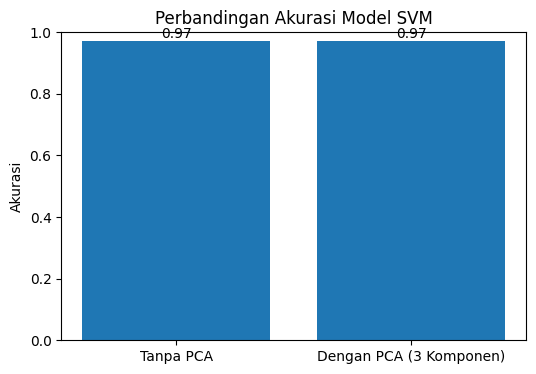

In [ ]:
plt.figure(figsize=(6,4))
plt.bar (['Tanpa PCA', 'Dengan PCA (3 Komponen)'], [acc_no_pca, acc_pca])
plt.title('Perbandingan Akurasi Model SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
for i, v in enumerate ([acc_no_pca, acc_pca]):
  plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()